In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

In [19]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [28]:
data_train.shape

(42000, 785)

In [29]:
data_test.shape

(28000, 784)

In [6]:
data_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
data_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


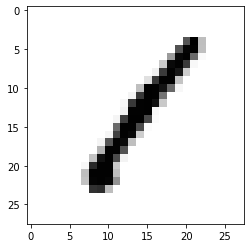

In [13]:
plt.imshow(np.array(data_train)[0, 1:].reshape(28,28), cmap='Greys')

(array([4132.,    0., 4684.,    0., 4177.,    0., 4351.,    0., 4072.,
           0., 3795.,    0., 4137.,    0., 4401.,    0., 4063.,    0.,
        4188.]),
 array([-0.25,  0.25,  0.75,  1.25,  1.75,  2.25,  2.75,  3.25,  3.75,
         4.25,  4.75,  5.25,  5.75,  6.25,  6.75,  7.25,  7.75,  8.25,
         8.75,  9.25]),
 <a list of 19 Patch objects>)

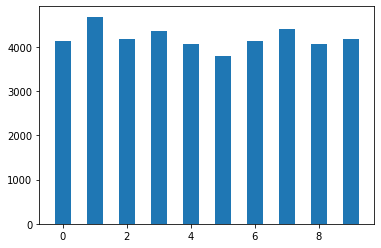

In [25]:
plt.hist(data_train['label'], bins=19, range=(-0.25, 9.25))

In [18]:
data_train.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [26]:
data_test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [30]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [31]:
y = to_categorical(data_train['label'])

In [32]:
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [59]:
X_train = np.array(data_train.drop(labels=['label'], axis=1)).reshape(-1, 28, 28, 1)

In [60]:
X_train[0,:, :, 0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,
          0,   0],
       [  

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X1, X2, y1, y2 = train_test_split(X_train, y, test_size=0.1)

In [63]:
X1.shape

(37800, 28, 28, 1)

In [64]:
X2.shape

(4200, 28, 28, 1)

In [56]:
y1.shape

(37800, 10)

In [65]:
37800/200

189.0

In [67]:
X1[0].shape

(28, 28, 1)